In [1]:
import matplotlib.pyplot as plt
from fairness_utils import *



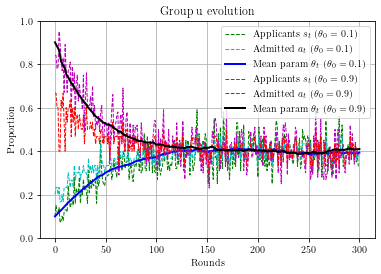

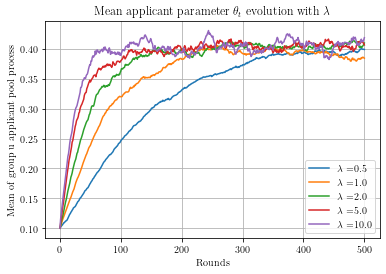

In [8]:
# Fairness framework target and hyperparameter settings
# study 1: identical score distributions
s_bar = 0.4
a_bar = 0.3
N = 100 
lambda_ = 2
eta = 0.05
theta_init = 0.1

# Set the score distribution params:
dist_type = 'gaussian'
mean_u = 5
mean_v = 5
std_u = 1
std_v = 1


# Generate reward table:
state_space = np.arange(N+1)
greedy_reward_table = np.zeros((N+1,int(N*a_bar)+1))

for i in range(len(state_space)):
    greedy_reward_table[i,:] = get_greedy_reward(dist_type, mean_u, std_u, mean_v, std_v, N, a_bar, state_space[i]/N)


num_rounds = 300
theta_init2 = 0.9
applicants_u, admitted_u, theta_vec, ov_rew = process_evolution(theta_init, lambda_, eta, N, a_bar, s_bar, greedy_reward_table, num_rounds)
applicants_u2, admitted_u2, theta_vec2, ov_rew2 = process_evolution(theta_init2, lambda_, eta, N, a_bar, s_bar, greedy_reward_table, num_rounds)


# Plot the evolution results

plt.figure()
plt.rc('text', usetex = True)
plt.rc('font', family='serif')

lw = 1
lw2 = 2
plt.plot(applicants_u, '--g', label='Applicants ' +r'$s_t$  ($\theta_0 = 0.1$)', linewidth=lw)
plt.plot(admitted_u, '--c', label='Admitted ' +r'$a_t$  ($\theta_0 = 0.1$)', linewidth=lw)
plt.plot(theta_vec, 'b', label='Mean param ' +r'$\theta_t$  ($\theta_0 = 0.1$)', linewidth=lw2)
plt.plot(applicants_u2, '--m', label='Applicants ' +r'$s_t$  ($\theta_0 = 0.9$)', linewidth=lw)
plt.plot(admitted_u2, '--r', label='Admitted ' +r'$a_t$  ($\theta_0 = 0.9$)', linewidth=lw)
plt.plot(theta_vec2, 'k', label='Mean param  ' +r'$\theta_t$  ($\theta_0 = 0.9$)', linewidth=lw2)
plt.title('Group u evolution')
plt.grid()
plt.xlabel('Rounds')
plt.ylabel('Proportion')
plt.legend(loc=1, prop={'size': 10})
plt.ylim((0,1.0))
plt.xlim()


lambda_vec = np.array([ 4, 5, 7.5, 10, 25, 100, 200])
lambda_vec = np.array([1,1.5, 2, 5, 10, 25, 50])
lambda_vec = np.array([0.5, 1, 2, 5, 10])

plt.figure()
for i in range(len(lambda_vec)):
    lambda_ = lambda_vec[i]
    applicants_u, admitted_u, theta_vec, rr = process_evolution(theta_init, lambda_,eta, N, a_bar, s_bar, greedy_reward_table, 500)
    lambda_str = r'$\lambda = $'  + str(lambda_)
    plt.plot(theta_vec, label=lambda_str)
    
plt.title('Mean applicant parameter ' + r'$\theta_t$'+ ' evolution with ' + r'$\lambda$')
plt.grid()
plt.xlabel('Rounds')
plt.ylabel('Mean of group u applicant pool process')
plt.legend(loc=0)   

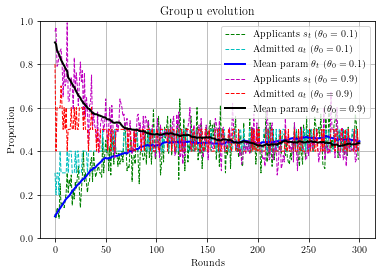

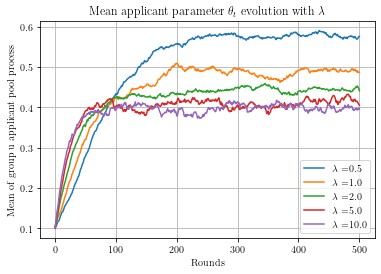

In [9]:
# Fairness framework target and hyperparameter settings
# study 2: distinct score distributions with very selective institution

# parameter settings:
s_bar = 0.4
a_bar = 0.1
N = 100 
lambda_ = 2
eta = 0.05
theta_init = 0.1

dist_type = 'gaussian'
mean_u = 4.9
mean_v = 5
std_u = np.sqrt(1.5)
std_v = 1

# Generate reward table:
state_space = np.arange(N+1)
greedy_reward_table = np.zeros((N+1,int(N*a_bar)+1))

for i in range(len(state_space)):
    greedy_reward_table[i,:] = get_greedy_reward(dist_type, mean_u, std_u, mean_v, std_v, N, a_bar, state_space[i]/N)

num_rounds = 300

theta_init2 = 0.9

applicants_u, admitted_u, theta_vec, ov_rew = process_evolution(theta_init, lambda_, eta, N, a_bar, s_bar, greedy_reward_table, num_rounds)
applicants_u2, admitted_u2, theta_vec2, ov_rew2 = process_evolution(theta_init2, lambda_, eta, N, a_bar, s_bar, greedy_reward_table, num_rounds)

plt.figure()
plt.rc('text', usetex = True)
plt.rc('font', family='serif')

lw = 1
lw2 = 2
plt.plot(applicants_u, '--g', label='Applicants ' +r'$s_t$  ($\theta_0 = 0.1$)', linewidth=lw)
plt.plot(admitted_u, '--c', label='Admitted ' +r'$a_t$  ($\theta_0 = 0.1$)', linewidth=lw)
plt.plot(theta_vec, 'b', label='Mean param ' +r'$\theta_t$  ($\theta_0 = 0.1$)', linewidth=lw2)
plt.plot(applicants_u2, '--m', label='Applicants ' +r'$s_t$  ($\theta_0 = 0.9$)', linewidth=lw)
plt.plot(admitted_u2, '--r', label='Admitted ' +r'$a_t$  ($\theta_0 = 0.9$)', linewidth=lw)
plt.plot(theta_vec2, 'k', label='Mean param  ' +r'$\theta_t$  ($\theta_0 = 0.9$)', linewidth=lw2)
plt.title('Group u evolution')
plt.grid()
plt.xlabel('Rounds')
plt.ylabel('Proportion')
plt.legend(loc=1, prop={'size': 10})
plt.ylim((0,1.0))
plt.xlim()


lambda_vec = np.array([ 4, 5, 7.5, 10, 25, 100, 200])
lambda_vec = np.array([1,1.5, 2, 5, 10, 25, 50])
lambda_vec = np.array([0.5, 1, 2, 5, 10])


plt.figure()
for i in range(len(lambda_vec)):
    lambda_ = lambda_vec[i]
    applicants_u, admitted_u, theta_vec, rr = process_evolution(theta_init, lambda_,eta, N, a_bar, s_bar, greedy_reward_table, 500)
    lambda_str = r'$\lambda = $'  + str(lambda_)
    plt.plot(theta_vec, label=lambda_str)
    
plt.title('Mean applicant parameter ' + r'$\theta_t$'+ ' evolution with ' + r'$\lambda$')
plt.grid()
plt.xlabel('Rounds')
plt.ylabel('Mean of group u applicant pool process')
plt.legend(loc=0)   